In [1]:
import pandas as pd

df = pd.read_csv('Pima_Indians_Diabetes_Database.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
keys = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for key in keys:
    df.loc[df[key] <= df[key].quantile(0.05), key]=None
    df.loc[df[key] >= df[key].quantile(0.95), key]=None

In [4]:
features = df[df.keys().drop('Outcome')]
outcome = df['Outcome']

In [5]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(features,outcome,stratify=outcome,random_state=42)

In [6]:
keys = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for key in keys:
    tmp = train_features[key].median()
    train_features[key].fillna(tmp,inplace=True)
    test_features[key].fillna(tmp,inplace=True)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,686.000000,691.000000,510.000000,374.000000,688.000000,768.000000,768.000000,768.000000
mean,3.845052,120.309038,71.154848,27.815686,135.267380,32.148256,0.471876,33.240885,0.348958
std,3.369578,24.891017,10.352234,8.915525,78.195521,5.501673,0.331329,11.760232,0.476951
min,0.000000,80.000000,40.000000,7.000000,14.000000,21.900000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,21.000000,75.250000,27.775000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,120.000000,32.150000,0.372500,29.000000,0.000000
75%,6.000000,137.000000,78.000000,35.000000,180.000000,35.900000,0.626250,41.000000,1.000000
max,17.000000,180.000000,90.000000,45.000000,392.000000,44.500000,2.420000,81.000000,1.000000


In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_features, train_target)

DecisionTreeClassifier(random_state=42)

In [9]:
y_pred = dt.predict(test_features)

In [10]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

print('Accuracy :',accuracy_score(test_target,y_pred))
print('Precision :',precision_score(test_target,y_pred))
print('Recall :',recall_score(test_target,y_pred))
print('F1 score :',f1_score(test_target,y_pred))

Accuracy : 0.6979166666666666
Precision : 0.5584415584415584
Recall : 0.6417910447761194
F1 score : 0.5972222222222222


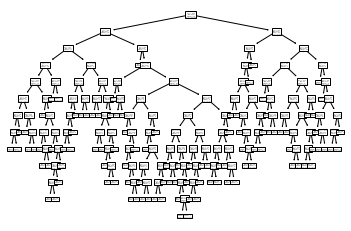

In [11]:
%matplotlib inline
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(dt)
plt.show()

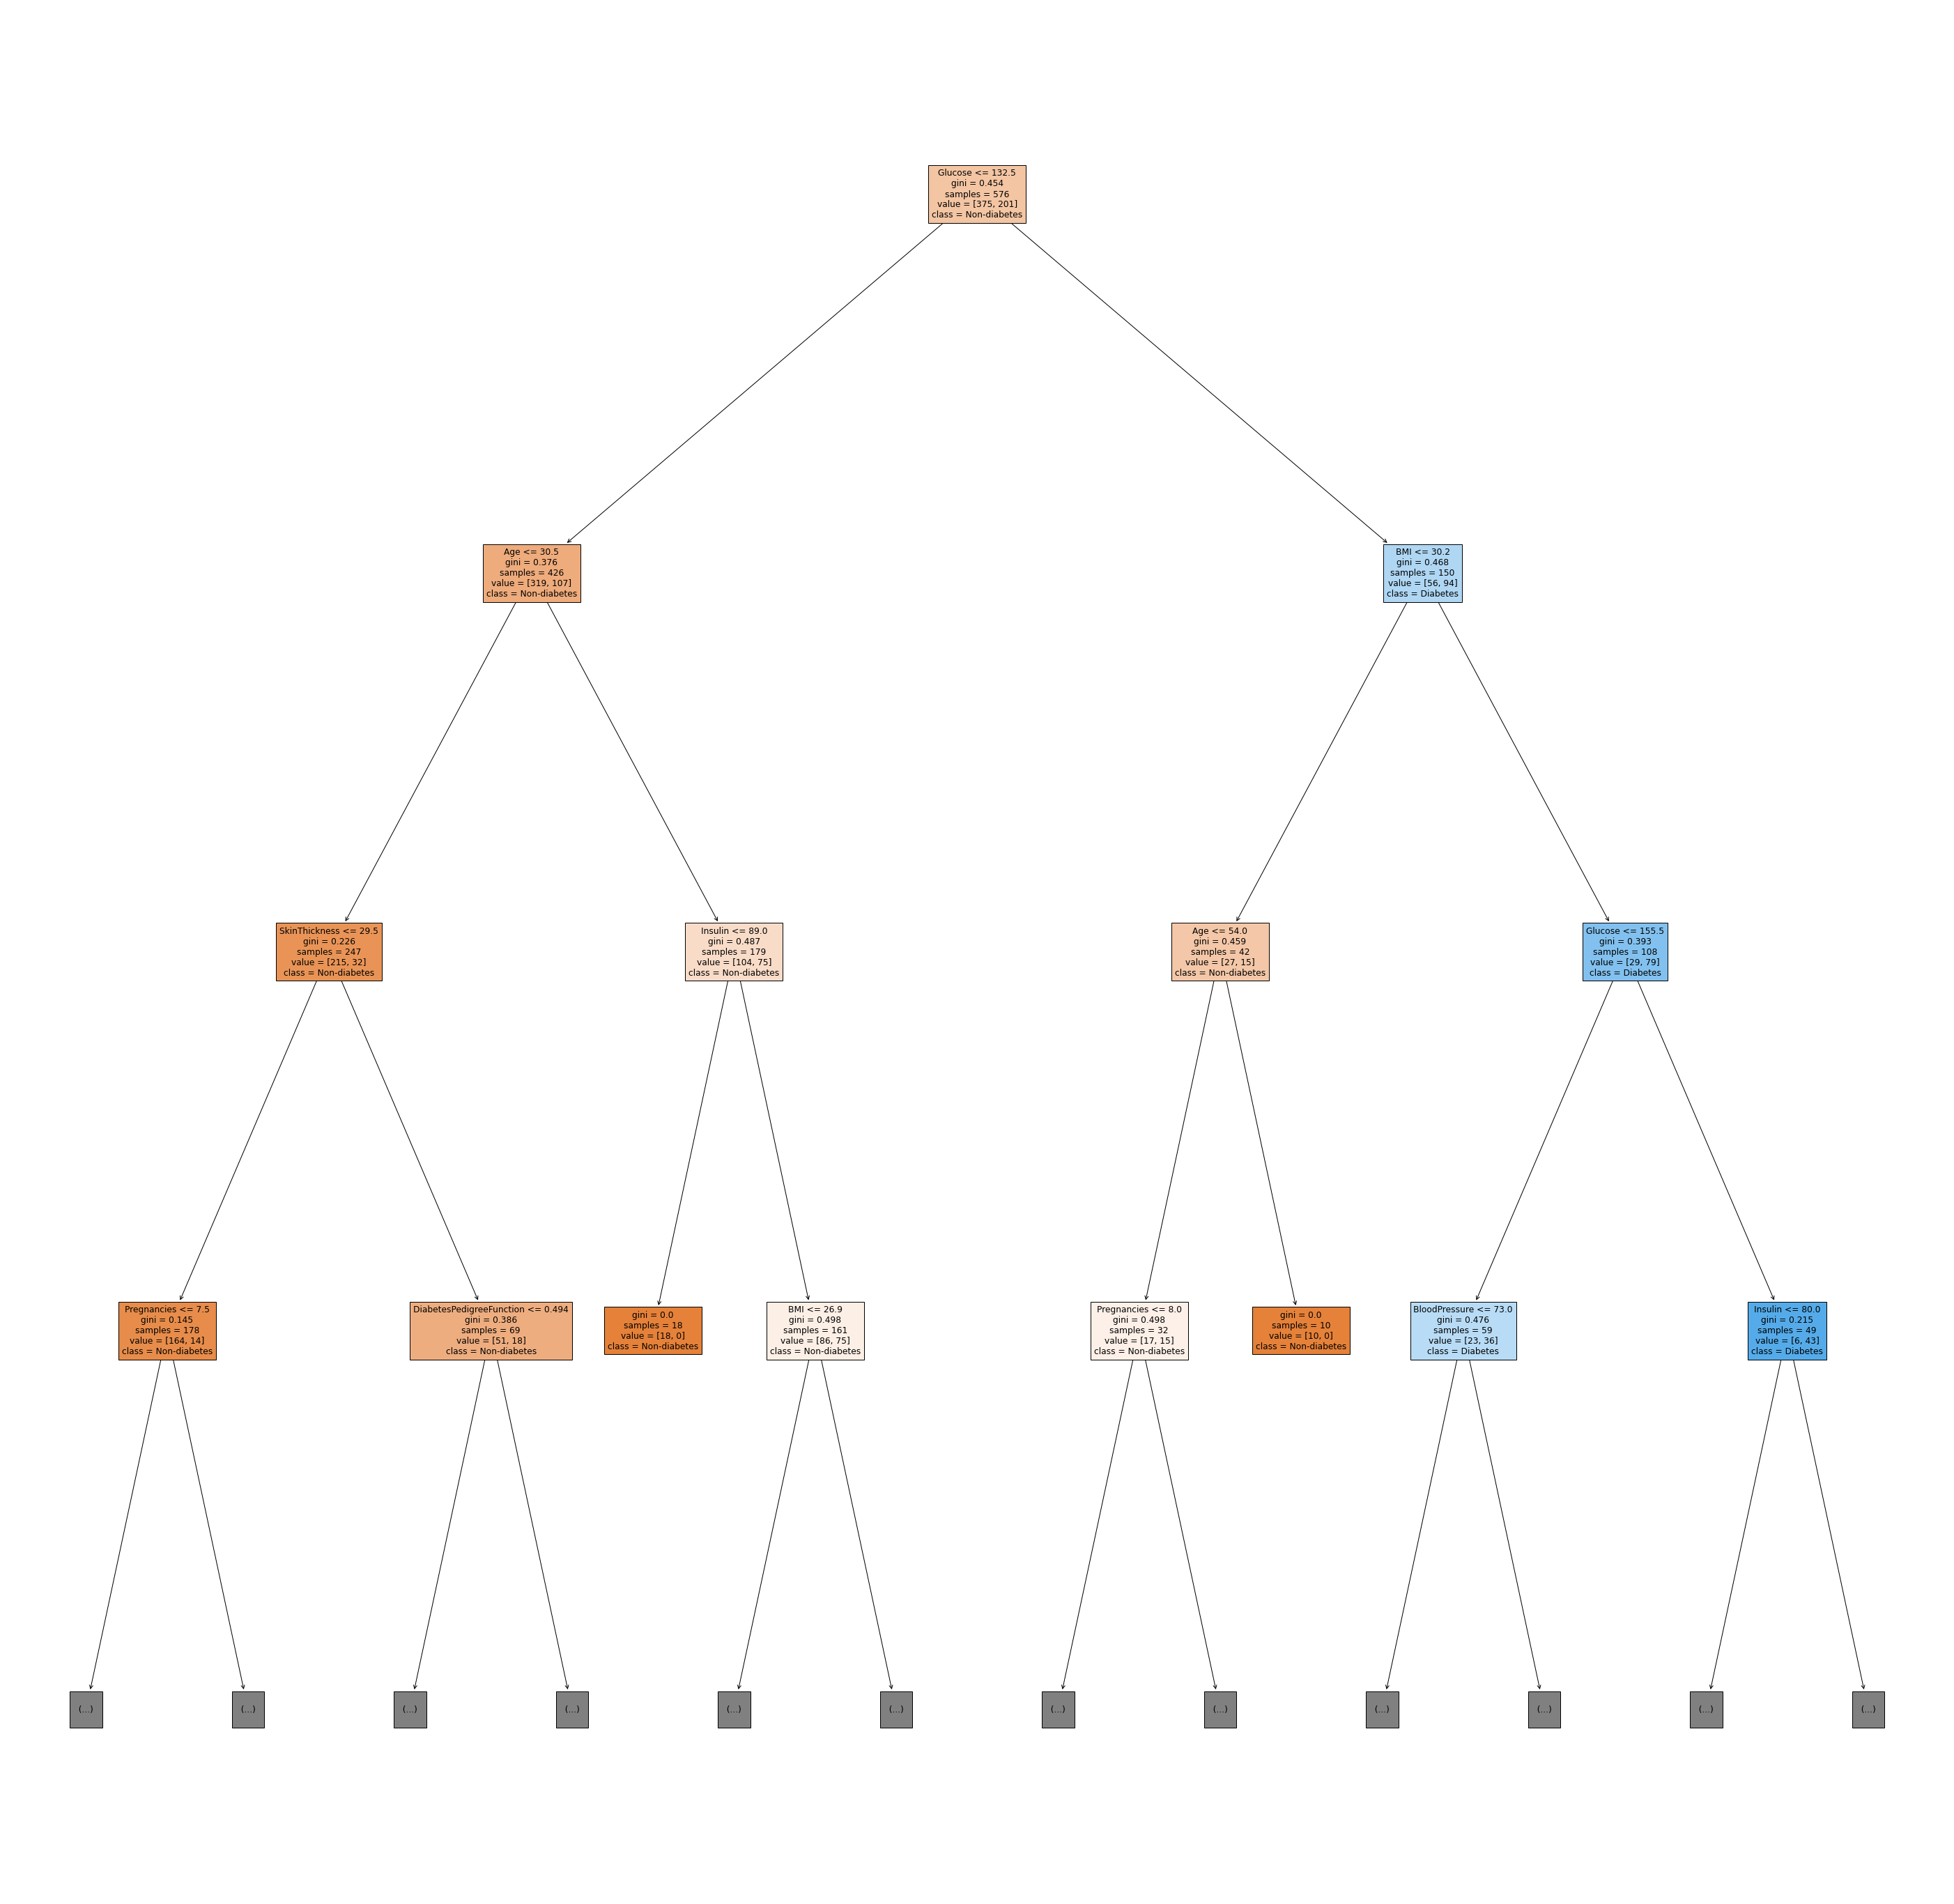

In [12]:
%matplotlib inline
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(50,50))
plot_tree(dt,max_depth=3,feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],class_names=['Non-diabetes','Diabetes'],filled = True)
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

dt = DecisionTreeClassifier(random_state=42)
parameters = {'criterion':['gini','entropy'],'max_depth':np.arange(1,11), 'min_samples_split':np.arange(2,11),'max_features':['auto','sqrt','log2',None]}
grid_search = GridSearchCV(dt, param_grid=parameters, cv=10, n_jobs=-1,scoring='recall')

In [14]:
grid_search.fit(train_features, train_target)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='recall')

In [15]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'min_samples_split': 2}

In [16]:
grid_search.best_score_

0.6730952380952381

In [17]:
dt = grid_search.best_estimator_

In [18]:
y_pred = dt.predict(test_features)

In [19]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

print('Accuracy :',accuracy_score(test_target,y_pred))
print('Precision :',precision_score(test_target,y_pred))
print('Recall :',recall_score(test_target,y_pred))
print('F1 score :',f1_score(test_target,y_pred))

Accuracy : 0.6822916666666666
Precision : 0.5384615384615384
Recall : 0.6268656716417911
F1 score : 0.5793103448275863
